In [1]:
import pandas as pd
import numpy as np
import re
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy import stats

## Reading Purchase Behaviour dataset

In [2]:
df1 = pd.read_csv("/content/QVI_purchase_behaviour.csv")
df1

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


### Checking different `LIFESTAGE` values present in the dataset

In [3]:
df1['LIFESTAGE'].value_counts()

,count
LIFESTAGE,
RETIREES,14805
OLDER SINGLES/COUPLES,14609
YOUNG SINGLES/COUPLES,14441
OLDER FAMILIES,9780
YOUNG FAMILIES,9178
MIDAGE SINGLES/COUPLES,7275
NEW FAMILIES,2549


### Checking the split of `PREMIUM_CUSTOMER` in the dataset

In [4]:
df1['PREMIUM_CUSTOMER'].value_counts()

,count
PREMIUM_CUSTOMER,
Mainstream,29245
Budget,24470
Premium,18922


## Reading Transaction Dataset

In [5]:
df2 = pd.read_excel('/content/QVI_transaction_data.xlsx')
df2

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


## Joining the dataset based on `LYLTY_CARD_NBR` common values
- Check for the difference in the row value before and after the join to check for discarding for rows

In [6]:
df = pd.merge(df1, df2, on='LYLTY_CARD_NBR', how='inner')
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,43390,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,43359,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,43531,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,43532,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,43406,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,43442,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,43374,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2370961,OLDER FAMILIES,Budget,43397,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
264834,2370961,OLDER FAMILIES,Budget,43400,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


### Check for the Data types for the columns after merging

In [7]:
df.dtypes

,0
LYLTY_CARD_NBR,int64
LIFESTAGE,object
PREMIUM_CUSTOMER,object
DATE,int64
STORE_NBR,int64
TXN_ID,int64
PROD_NBR,int64
PROD_NAME,object
PROD_QTY,int64
TOT_SALES,float64


### Convert the integer date value from excel to `to_datetime`

- We can see that the date column is in an integer format. Change this to a date format as Excel integer dates begin on `1899-12-30`.

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'], unit='D', origin='1899-12-30')
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264831,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4
264834,2370961,OLDER FAMILIES,Budget,2018-10-27,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2


### Checking words in `PROD_NAME`

- Remove any special characters
- Normalize spaces

In [9]:
def clean_product_name(name):
    # Remove digits and quantities
    name = re.sub(r'\d+\w*', '', name)
    # Remove special characters
    name = re.sub(r'[^\w\s]', ' ', name)
    return name

# Apply cleaning to the PROD_NAME column
df = df.copy()
df['CLEANED_PROD_NAME'] = df['PROD_NAME'].apply(clean_product_name)

# Show before and after
print(df[['PROD_NAME', 'CLEANED_PROD_NAME']].head())

                                PROD_NAME                   CLEANED_PROD_NAME
0  Natural Chip        Compny SeaSalt175g  Natural Chip        Compny SeaSalt
1   Red Rock Deli Chikn&Garlic Aioli 150g   Red Rock Deli Chikn Garlic Aioli 
2   Grain Waves Sour    Cream&Chives 210G   Grain Waves Sour    Cream Chives 
3  Natural ChipCo      Hony Soy Chckn175g  Natural ChipCo      Hony Soy Chckn
4          WW Original Stacked Chips 160g          WW Original Stacked Chips 


### Split all words in `PROD_NAME` and count the occurence of each word

In [10]:
all_words = ' '.join(df['CLEANED_PROD_NAME']).split()
word_counts = Counter(all_words)

word_counts_df = pd.DataFrame.from_dict(word_counts, orient='index', columns=['count'])
word_counts_df = word_counts_df.sort_values('count', ascending=False)

print("Word Counts:")
word_counts_df.head(20)

Word Counts:


,count
Chips,49770
Kettle,41288
Smiths,28860
Salt,27976
Cheese,27890
Pringles,25102
Doritos,24962
Crinkle,23960
Corn,22063
Original,21560


#### Removing rows where 'salsa' is present

In [11]:
if 'Salsa' in word_counts_df.index:
    print("'Salsa' found with count:", word_counts_df.loc['Salsa', 'count'])
else:
    print("'salsa' not found in product names")

'Salsa' found with count: 18094


In [12]:
df = df[~df['CLEANED_PROD_NAME'].str.contains('Salsa', case=False, na=False)]
df = df.drop(columns=['CLEANED_PROD_NAME'])
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0
264831,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4


### Checking for any null values in the dataset

In [13]:
df.isnull().sum()

,0
LYLTY_CARD_NBR,0
LIFESTAGE,0
PREMIUM_CUSTOMER,0
DATE,0
STORE_NBR,0
TXN_ID,0
PROD_NBR,0
PROD_NAME,0
PROD_QTY,0
TOT_SALES,0


### Summary of the numerical values of the dataset

In [14]:
df.describe()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,2.467420e+05,246742,246742.000000,2.467420e+05,246742.000000,246742.000000,246742.000000
mean,1.355310e+05,2018-12-30 01:19:01.211468288,135.051098,1.351311e+05,56.351789,1.908062,7.321322
min,1.000000e+03,2018-07-01 00:00:00,1.000000,1.000000e+00,1.000000,1.000000,1.700000
25%,7.001500e+04,2018-09-30 00:00:00,70.000000,6.756925e+04,26.000000,2.000000,5.800000
50%,1.303670e+05,2018-12-30 00:00:00,130.000000,1.351830e+05,53.000000,2.000000,7.400000
75%,2.030840e+05,2019-03-31 00:00:00,203.000000,2.026538e+05,87.000000,2.000000,8.800000
max,2.373711e+06,2019-06-30 00:00:00,272.000000,2.415841e+06,114.000000,200.000000,650.000000
std,8.071528e+04,NaN,76.787096,7.814772e+04,33.695428,0.659831,3.077828


### Removing values skewing the dataset

The maximum value for `PROD_QTY` is 200. The mean value for `PROD_QTY` is 1.9, which is a significant difference from 200, making this an outlier.

The outlier value is removed from the dataset to not skew it.

In [15]:
df_200 = df[df['PROD_QTY'] == 200]
df_200

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
221625,226000,OLDER FAMILIES,Premium,2018-08-19,226,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
221626,226000,OLDER FAMILIES,Premium,2019-05-20,226,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


In [16]:
df = df[df['LYLTY_CARD_NBR'] != 226000]
df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9
...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88,240350,4,Dorito Corn Chp Supreme 380g,2,13.0
264831,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2
264832,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2
264833,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4


### Checking for the date values present in the dataset

Only 364 values are present. There should 365 values present, meaning one date value is not there.

In [17]:
daily_counts = df['DATE'].value_counts().sort_index()
daily_counts

,count
DATE,
2018-07-01,663
2018-07-02,650
2018-07-03,674
2018-07-04,669
2018-07-05,660
...,...
2019-06-26,657
2019-06-27,669
2019-06-28,673


In [18]:
full_dates = pd.date_range(start='2018-07-01', end='2019-06-30', freq='D')
print(f"Total days in period: {len(full_dates)}")

Total days in period: 365


In [19]:
# Get unique dates from your data
transaction_dates = df['DATE'].dt.normalize().unique()
print(f"Unique dates in your data: {len(transaction_dates)}")

# Find the missing date
missing_date = full_dates.difference(transaction_dates)
print(f"\nMissing date: {missing_date}")

Unique dates in your data: 364

Missing date: DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq='D')


### Split the `PROD_NAME` based on pack size

Create a new column `PACK_SIZE` for the size of the potato chips

In [20]:
clean_df = df.copy()
clean_df['PROD_NAME'] = clean_df['PROD_NAME'].str.lower()
clean_df['PACK_SIZE'] = clean_df['PROD_NAME'].str.extract(r'(\d+)g').astype(float)
clean_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,1000,YOUNG SINGLES/COUPLES,Premium,2018-10-17,1,1,5,natural chip compny seasalt175g,2,6.0,175.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,2018-09-16,1,2,58,red rock deli chikn&garlic aioli 150g,1,2.7,150.0
2,1003,YOUNG FAMILIES,Budget,2019-03-07,1,3,52,grain waves sour cream&chives 210g,1,3.6,210.0
3,1003,YOUNG FAMILIES,Budget,2019-03-08,1,4,106,natural chipco hony soy chckn175g,1,3.0,175.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,2018-11-02,1,5,96,ww original stacked chips 160g,1,1.9,160.0
...,...,...,...,...,...,...,...,...,...,...,...
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88,240350,4,dorito corn chp supreme 380g,2,13.0,380.0
264831,2370701,YOUNG FAMILIES,Mainstream,2018-12-08,88,240378,24,grain waves sweet chilli 210g,2,7.2,210.0
264832,2370751,YOUNG FAMILIES,Premium,2018-10-01,88,240394,60,kettle tortilla chpsfeta&garlic 150g,2,9.2,150.0
264833,2370961,OLDER FAMILIES,Budget,2018-10-24,88,240480,70,tyrrells crisps lightly salted 165g,2,8.4,165.0


Sort the values based on `PACK_SIZE`

In [21]:
clean_df = clean_df.sort_values(by='PACK_SIZE')
clean_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
155178,157002,OLDER SINGLES/COUPLES,Mainstream,2019-01-06,157,158387,38,infuzions mango chutny papadums 70g,2,4.8,70.0
4868,5108,OLDER FAMILIES,Budget,2019-02-28,5,4990,38,infuzions mango chutny papadums 70g,2,4.8,70.0
155018,156236,MIDAGE SINGLES/COUPLES,Budget,2018-12-30,156,158222,38,infuzions mango chutny papadums 70g,2,4.8,70.0
208783,213182,YOUNG FAMILIES,Premium,2019-02-25,213,213089,38,infuzions mango chutny papadums 70g,2,4.8,70.0
208594,213153,RETIREES,Budget,2019-04-23,213,212896,38,infuzions mango chutny papadums 70g,2,4.8,70.0
...,...,...,...,...,...,...,...,...,...,...,...
128,1116,OLDER SINGLES/COUPLES,Premium,2019-02-26,1,137,14,smiths crnkle chip orgnl big bag 380g,2,11.8,380.0
173,1159,YOUNG SINGLES/COUPLES,Mainstream,2018-12-15,1,183,14,smiths crnkle chip orgnl big bag 380g,1,5.9,380.0
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88,240350,4,dorito corn chp supreme 380g,2,13.0,380.0
264792,861921,OLDER SINGLES/COUPLES,Premium,2019-06-26,155,85336,4,dorito corn chp supreme 380g,2,13.0,380.0


Show the distribution of the `PACK_SIZE` and the number of transactions

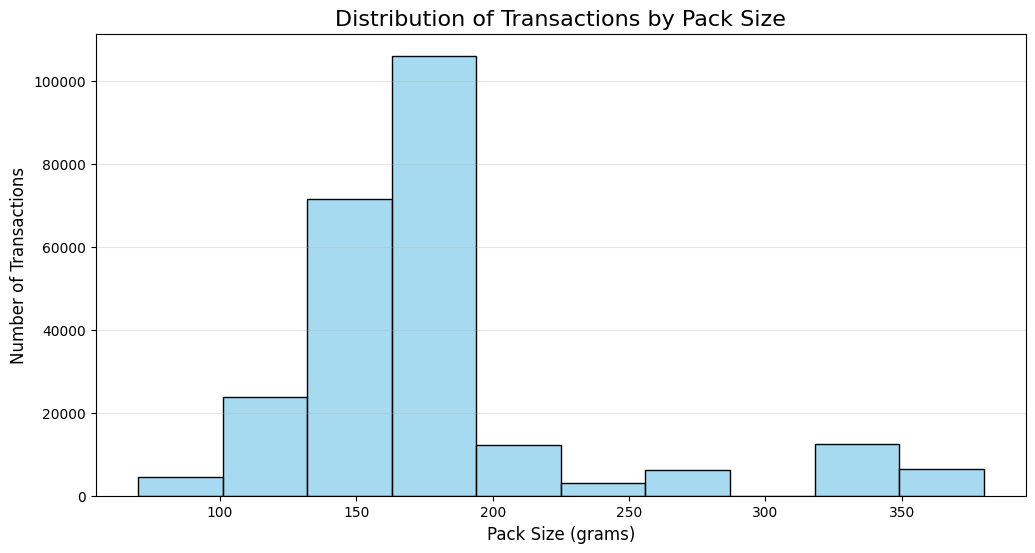

In [22]:
plt.figure(figsize=(12, 6))

# Create histogram with kernel density estimate
ax = sns.histplot(data=clean_df, x='PACK_SIZE', bins=10, color='skyblue')

# Customize the plot
plt.title('Distribution of Transactions by Pack Size', fontsize=16)
plt.xlabel('Pack Size (grams)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.grid(axis='y', alpha=0.3)

### Extract brand names from `PROD_NAME`

The first word in `PROD_NAME` is the brand name. Create a new column to store it.

In [23]:
# Extract brand as the first word in PROD_NAME
clean_df['BRAND'] = clean_df['PROD_NAME'].str.split().str[0]

# Clean any remaining special characters from brands
clean_df['BRAND'] = clean_df['BRAND'].str.replace(r'[^a-zA-Z]', '', regex=True)

# Standardize case
clean_df['BRAND'] = clean_df['BRAND'].str.title()

In [24]:
clean_df.head(5)

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
155178,157002,OLDER SINGLES/COUPLES,Mainstream,2019-01-06,157,158387,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions
4868,5108,OLDER FAMILIES,Budget,2019-02-28,5,4990,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions
155018,156236,MIDAGE SINGLES/COUPLES,Budget,2018-12-30,156,158222,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions
208783,213182,YOUNG FAMILIES,Premium,2019-02-25,213,213089,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions
208594,213153,RETIREES,Budget,2019-04-23,213,212896,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions


### Check the `BRAND` names to find any discrepancies in the dataset

In [25]:
clean_df['BRAND'].value_counts()

,count
BRAND,
Kettle,41288
Smiths,27390
Pringles,25102
Doritos,22041
Thins,14075
Rrd,11894
Infuzions,11057
Ww,10320
Cobs,9693


#### Map new values in the dataset having multiple values to the original brand name

In [26]:
brand_mapping = {
    'Red': 'Red Rock Deli',
    'Rrd': 'Red Rock Deli',
    'Smith': 'Smiths',
    'Dorito': 'Doritos',
    'Infzns': 'Infuzions',
    'Grain': 'Grain Waves',
    'Grnwves': 'Grain Waves',
    'Natural': 'Natural Chip Co',
    'Ncc': 'Natural Chip Co',
    'Snbts': 'Sunbites',
    'Burger': 'Burger Rings',
    'French': 'French Fries',
    'Ww': 'Woolworths',
    'Ccs': 'CCs'
}

existing_brands = set(clean_df['BRAND'].unique())
standard_brands = {b: b for b in existing_brands if b not in brand_mapping}
brand_mapping.update(standard_brands)

#### Change the `BRAND` in the DataFrame based on the mapping above

In [27]:
clean_df['BRAND'] = clean_df['BRAND'].map(brand_mapping).fillna(clean_df['BRAND'])
clean_df

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
155178,157002,OLDER SINGLES/COUPLES,Mainstream,2019-01-06,157,158387,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions
4868,5108,OLDER FAMILIES,Budget,2019-02-28,5,4990,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions
155018,156236,MIDAGE SINGLES/COUPLES,Budget,2018-12-30,156,158222,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions
208783,213182,YOUNG FAMILIES,Premium,2019-02-25,213,213089,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions
208594,213153,RETIREES,Budget,2019-04-23,213,212896,38,infuzions mango chutny papadums 70g,2,4.8,70.0,Infuzions
...,...,...,...,...,...,...,...,...,...,...,...,...
128,1116,OLDER SINGLES/COUPLES,Premium,2019-02-26,1,137,14,smiths crnkle chip orgnl big bag 380g,2,11.8,380.0,Smiths
173,1159,YOUNG SINGLES/COUPLES,Mainstream,2018-12-15,1,183,14,smiths crnkle chip orgnl big bag 380g,1,5.9,380.0,Smiths
264830,2370651,MIDAGE SINGLES/COUPLES,Mainstream,2018-08-03,88,240350,4,dorito corn chp supreme 380g,2,13.0,380.0,Doritos
264792,861921,OLDER SINGLES/COUPLES,Premium,2019-06-26,155,85336,4,dorito corn chp supreme 380g,2,13.0,380.0,Doritos


In [28]:
clean_df['BRAND'].value_counts().sort_index()

,count
BRAND,
Burger Rings,1564
CCs,4551
Cheetos,2927
Cheezels,4603
Cobs,9693
Doritos,25224
French Fries,1418
Grain Waves,7740
Infuzions,14201


## Data Analysis

In [29]:
# Calculate percentages
total_sales = clean_df['TOT_SALES'].sum()
sales = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
sales['PCT'] = sales['TOT_SALES'] / total_sales * 100
sales['PCT'] = sales['PCT'].round(2)

fig = px.bar(
    sales,
    x="LIFESTAGE",
    y="TOT_SALES",
    color="PREMIUM_CUSTOMER",
    text="PCT",
    color_discrete_map={
        "Premium": "#1f6f6f",
        "Mainstream": "#54a1a1",
        "Budget": "#9fc8c8"
    }
)
fig.show()

In [30]:
sales = sales.sort_values(by='TOT_SALES', ascending=False)
sales.head(5)

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES,PCT
6,OLDER FAMILIES,Budget,156863.75,8.69
19,YOUNG SINGLES/COUPLES,Mainstream,147582.20,8.18
13,RETIREES,Mainstream,145168.95,8.04
15,YOUNG FAMILIES,Budget,129717.95,7.19
9,OLDER SINGLES/COUPLES,Budget,127833.60,7.08


This shows that the sales are coming mainly from
1. Budget - older families
2. Mainstream - young singles/couples
3. Mainstream - retirees


In [31]:
# Calculate percentages
total_customers = clean_df['LYLTY_CARD_NBR'].nunique()
customers = df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['LYLTY_CARD_NBR'].nunique().reset_index()
customers['CCT'] = (customers['LYLTY_CARD_NBR'] / total_customers * 100).round(2)

fig = px.bar(
    customers,
    x="LIFESTAGE",
    y="CCT",
    color="PREMIUM_CUSTOMER",
    text="CCT",
    color_discrete_map={
        "Premium": "#1f6f6f",
        "Mainstream": "#54a1a1",
        "Budget": "#9fc8c8"
    }
)
fig.show()

This shows that there are more
1. Mainstream - young singles/couples
2. Mainstream - retirees who buy chips

This contributes to there being more sales to these customer segments but this is not a major driver for the Budget

In [32]:
# Calculate price per unit per customer segment
price_analysis = clean_df.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'], observed=True).apply(
    lambda x: pd.Series({
        'PRICE_PER_UNIT': (x['TOT_SALES'].sum() / x['PROD_QTY'].sum()).round(2)
    })
).reset_index()

fig = px.bar(
    price_analysis,
    x="LIFESTAGE",
    y="PRICE_PER_UNIT",
    color="PREMIUM_CUSTOMER",
    text="PRICE_PER_UNIT",
    color_discrete_map={
        "Premium": "#1f6f6f",
        "Mainstream": "#54a1a1",
        "Budget": "#9fc8c8"
    }
)
fig.show()

<ipython-input-32-c5292277bf01>:2: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.

This may be due to premium shoppers being more likely to
buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption.
This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

In [33]:
# Calculate price per unit for each transaction
clean_df['PRICE_PER_UNIT'] = clean_df['TOT_SALES'] / clean_df['PROD_QTY']

# Create subsets for the groups we want to compare
mainstream = clean_df[(clean_df['PREMIUM_CUSTOMER'] == 'Mainstream') &
                (clean_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']))]['PRICE_PER_UNIT']

premium = clean_df[(clean_df['PREMIUM_CUSTOMER'] == 'Premium') &
             (clean_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']))]['PRICE_PER_UNIT']

budget = clean_df[(clean_df['PREMIUM_CUSTOMER'] == 'Budget') &
            (clean_df['LIFESTAGE'].isin(['MIDAGE SINGLES/COUPLES', 'YOUNG SINGLES/COUPLES']))]['PRICE_PER_UNIT']

A. Mainstream vs Premium

In [34]:
t_stat_main_prem, p_val_main_prem = stats.ttest_ind(mainstream, premium, equal_var=False)
print(f"Mainstream vs Premium: t-statistic = {t_stat_main_prem:.3f}, p-value = {p_val_main_prem:.4f}")

Mainstream vs Premium: t-statistic = 28.338, p-value = 0.0000


- The extremely small p-value (effectively zero) indicates there's essentially no chance this price difference occurred randomly.
- Since the t-value is positive, Mainstream customers pay significantly more per unit than Premium customers (assuming you didn't reverse the order in your test).

B. Mainstream vs Budget


In [35]:
t_stat_main_bud, p_val_main_bud = stats.ttest_ind(mainstream, budget, equal_var=False)
print(f"Mainstream vs Budget: t-statistic = {t_stat_main_bud:.3f}, p-value = {p_val_main_bud:.4f}")

Mainstream vs Budget: t-statistic = 31.671, p-value = 0.0000


- The p-value (0.0056) is well below 0.05, meaning this difference is very unlikely due to chance.
- The positive t-value indicates Premium customers pay more per unit than Budget customers.

C. Premium vs Budget


In [36]:
t_stat_prem_bud, p_val_prem_bud = stats.ttest_ind(premium, budget, equal_var=False)
print(f"Premium vs Budget: t-statistic = {t_stat_prem_bud:.3f}, p-value = {p_val_prem_bud:.4f}")

Premium vs Budget: t-statistic = 2.769, p-value = 0.0056


- The p-value is effectively zero.
- Mainstream customers pay substantially more than Budget customers.

### Filter target segment of Mainstream - Young Singles/Couples and find their affinity for Potato Chips Brand

In [49]:
# Filter for our target segment
segment = clean_df[(clean_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
              (clean_df['PREMIUM_CUSTOMER'] == 'Mainstream')]
rest_of_segments = clean_df[~((clean_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
             (clean_df['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Calculate total quantities
quantity_segment = segment['PROD_QTY'].sum()
quantity_other = rest_of_segments['PROD_QTY'].sum()

# Calculate brand proportions
quantity_segment_by_brand = segment.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_segment_by_brand['targetSegment'] = quantity_segment_by_brand['PROD_QTY'] / quantity_segment
quantity_other_brand = rest_of_segments.groupby('BRAND')['PROD_QTY'].sum().reset_index()
quantity_other_brand['otherSegment'] = quantity_other_brand['PROD_QTY'] / quantity_other

# Merge and calculate brand affinity
brand_proportions = pd.merge(
    quantity_segment_by_brand[['BRAND', 'targetSegment']],
    quantity_other_brand[['BRAND', 'otherSegment']],
    on='BRAND',
    how='left'
).fillna(0)  # Fill NA for brands not present in one group

brand_proportions['affinityToBrand'] = brand_proportions['targetSegment'] / brand_proportions['otherSegment']

# Sort by highest affinity
brand_proportions = brand_proportions.sort_values('affinityToBrand', ascending=False)

print("Brand Affinity for Mainstream Young Singles/Couples:")
print(brand_proportions)

Brand Affinity for Mainstream Young Singles/Couples:
              BRAND  targetSegment  otherSegment  affinityToBrand
18         Tyrrells       0.031553      0.025692         1.228095
17         Twisties       0.046184      0.037877         1.219319
5           Doritos       0.122761      0.101075         1.214553
9            Kettle       0.197985      0.165553         1.195897
16         Tostitos       0.045411      0.037978         1.195713
11         Pringles       0.119420      0.100635         1.186670
4              Cobs       0.044638      0.039049         1.143124
8         Infuzions       0.064679      0.057065         1.133435
15            Thins       0.060373      0.056986         1.059423
7       Grain Waves       0.032712      0.031188         1.048873
3          Cheezels       0.017971      0.018647         0.963753
13           Smiths       0.096370      0.124584         0.773536
6      French Fries       0.003948      0.005758         0.685569
2           Cheetos    

The Young Singles/Couples have 1.22 times more affinity to buy Tyrrells

In [50]:
# Filter for our target segment
target_segment = clean_df[
    (clean_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
    (clean_df['PREMIUM_CUSTOMER'] == 'Mainstream')
]

# Calculate brand preferences
brand_preferences = target_segment.groupby('BRAND').agg(
    transaction_count=('TXN_ID', 'count'),
    total_quantity=('PROD_QTY', 'sum'),
    total_sales=('TOT_SALES', 'sum'),
    avg_price_per_unit=('PRICE_PER_UNIT', 'mean')
).sort_values('total_sales', ascending=False)

In [51]:
print("Top 10 Brands for Mainstream Young Singles/Couples:")
print(brand_preferences.head(10)[['total_sales', 'transaction_count', 'avg_price_per_unit']])

Top 10 Brands for Mainstream Young Singles/Couples:
           total_sales  transaction_count  avg_price_per_unit
BRAND                                                        
Kettle         35423.6               3844            4.939438
Doritos        20925.9               2379            4.701261
Pringles       16006.2               2315            3.700000
Smiths         14958.9               1921            4.261947
Infuzions       8749.4               1250            3.729440
Twisties        7539.8                900            4.506667
Tostitos        7238.0                890            4.400000
Thins           7217.1               1166            3.300000
Cobs            6144.6                864            3.800000
Tyrrells        4800.6                619            4.200000


<ipython-input-52-2e399133aac8>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




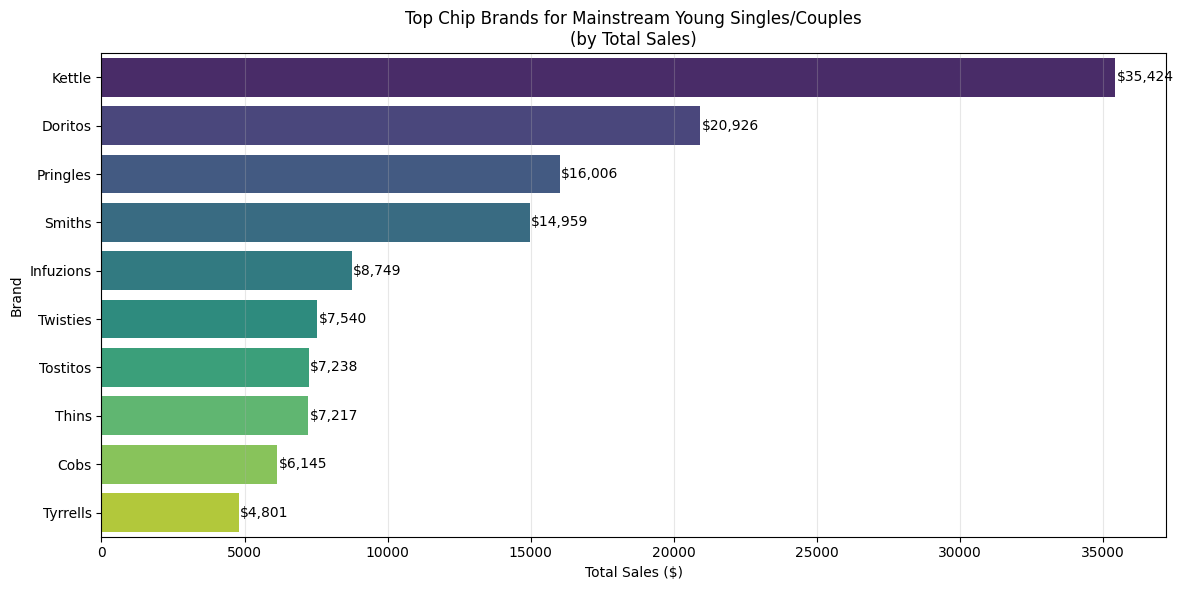

In [52]:
plt.figure(figsize=(12, 6))

# Plot sales by brand
sns.barplot(
    data=brand_preferences.reset_index().head(10),
    x='total_sales',
    y='BRAND',
    palette='viridis'
)

plt.title('Top Chip Brands for Mainstream Young Singles/Couples\n(by Total Sales)')
plt.xlabel('Total Sales ($)')
plt.ylabel('Brand')
plt.grid(axis='x', alpha=0.3)

# Add value labels
for i, v in enumerate(brand_preferences.head(10)['total_sales']):
    plt.text(v + 50, i, f"${v:,.0f}", color='black', va='center')

plt.tight_layout()
plt.show()

In [53]:
# Calculate market share within segment
brand_preferences['market_share'] = (
    brand_preferences['total_sales'] /
    brand_preferences['total_sales'].sum() * 100
)

print("\nMarket Share of Top Brands:")
print(brand_preferences.head(5)[['market_share']])


Market Share of Top Brands:
           market_share
BRAND                  
Kettle        24.002624
Doritos       14.179149
Pringles      10.845617
Smiths        10.135978
Infuzions      5.928493


Young Couples/Single are more likely to purchase Kettle chips compared to the
rest of the population


### Filter target segment of Mainstream - Young Singles/Couples and find their affinity for Packet Size

In [59]:
# Filter segments
target_segment = clean_df[(clean_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
                       (clean_df['PREMIUM_CUSTOMER'] == 'Mainstream')]
other_segments = clean_df[~((clean_df['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') &
                         (clean_df['PREMIUM_CUSTOMER'] == 'Mainstream'))]

# Calculate total units purchased by pack size for each group
target_pack = target_segment.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()
other_pack = other_segments.groupby('PACK_SIZE')['PROD_QTY'].sum().reset_index()

# Calculate proportions
total_target = target_pack['PROD_QTY'].sum()
total_other = other_pack['PROD_QTY'].sum()

target_pack['target_proportion'] = target_pack['PROD_QTY'] / total_target
other_pack['other_proportion'] = other_pack['PROD_QTY'] / total_other

# Merge and calculate affinity
pack_affinity = pd.merge(
    target_pack[['PACK_SIZE', 'target_proportion']],
    other_pack[['PACK_SIZE', 'other_proportion']],
    on='PACK_SIZE',
    how='outer'
).fillna(0)  # Fill NA for pack sizes not present in one group

pack_affinity['affinity'] = pack_affinity['target_proportion'] / pack_affinity['other_proportion']

# Sort by highest affinity
pack_affinity = pack_affinity.sort_values('affinity', ascending=False)

print("Pack Size Affinity for Mainstream Young Singles/Couples:")
print(pack_affinity)

Pack Size Affinity for Mainstream Young Singles/Couples:
    PACK_SIZE  target_proportion  other_proportion  affinity
17      270.0           0.031829          0.025096  1.268287
19      380.0           0.032160          0.025584  1.257030
18      330.0           0.061284          0.050162  1.221717
4       134.0           0.119420          0.100635  1.186670
2       110.0           0.106280          0.089791  1.183637
14      210.0           0.029124          0.025121  1.159318
5       135.0           0.014769          0.013075  1.129511
16      250.0           0.014355          0.012781  1.123166
9       170.0           0.080773          0.080986  0.997370
6       150.0           0.157598          0.163421  0.964372
10      175.0           0.254990          0.270007  0.944382
8       165.0           0.055652          0.062268  0.893757
12      190.0           0.007481          0.012442  0.601271
11      180.0           0.003589          0.006067  0.591538
7       160.0           0.00

The Mainstream Single/Couples having 1.26 times more affinity to buy a 270g packet